# Relax Data Challenege

### Dependencies & data

In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set()
%matplotlib inline

In [3]:
# User data
user_df = pd.read_csv('takehome_users.csv', parse_dates=['creation_time'], encoding='latin-1')
print(user_df.info())
user_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB
None


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [7]:
# Convert `last_session_creation_time` to datetime
user_df['last_session_creation_time'] = pd.to_datetime(user_df.last_session_creation_time, unit='s')
user_df.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0


In [6]:
# Usage data
usage_df = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])
print(usage_df.info())
usage_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB
None


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1


### Find adopted users

In [55]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [56]:
usage_7d = usage.groupby(['user_id', pd.Grouper(key='time_stamp', freq='7d')]).count()
usage_7d.head()

visited
user_id time_stamp         
1       2014-04-17        1
2       2013-11-14        1
        2013-11-28        1
        2013-12-05        1
        2013-12-19        1

In [57]:
use_gte3 = usage_7d[usage_7d.visited >= 3]
adopted_users = use_gte3.index.get_level_values(0).unique().values
adopted_users

array([   10,    42,    43, ..., 11969, 11975, 11988])

In [58]:
# Create a label for adopted users
users['adopted_user'] = np.where(users.object_id.isin(adopted_users), 1, 0)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [59]:
# Confirm equal length
print(adopted_users.shape[0])
print(users.adopted_user.sum())

1445
1445


### Datetime variables

In [60]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                12000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)


In [61]:
users.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
adopted_user                      2
dtype: int64

In [62]:
# Create a feature for how many times each user logged in
usage_count = usage.groupby('user_id').sum().reset_index()
usage_count.columns = ['object_id', 'visited']
users = pd.merge(users, usage_count, on='object_id', how='left')
users.visited.fillna(0, inplace=True)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1.0


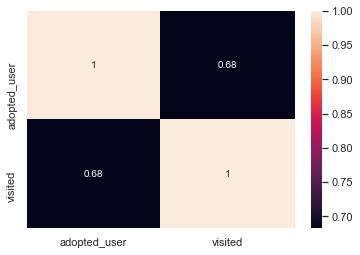

In [67]:
sns.heatmap(users[['adopted_user', 'visited']].corr(), annot=True)

In [13]:
# Create a feature for each user's first day of use
first_use = usage.groupby('user_id')[['time_stamp']].first().reset_index()
first_use.columns = ['object_id', 'first_use']
users = pd.merge(users, first_use, on='object_id', how='left')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,visited,first_use
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0,14.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1.0,2013-01-22 10:14:20


In [14]:
# Calculate the number of days between account creation and first use
users['time_delta'] = users.first_use - users.creation_time
users['time_delta'] = users.time_delta.dt.days
users.time_delta.fillna(999, inplace=True)
users.drop('first_use', axis=1, inplace=True)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,visited,time_delta
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0,14.0,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1.0,5.0


In [15]:
print(f'{np.round(users[users.time_delta < 1].adopted_user.mean() * 100, 2)}% of users who login within the same DAY as creating an account are adopted users.')
print(f'{np.round(users[users.time_delta < 7].adopted_user.mean() * 100, 2)}% of users who login within the same WEEK as creating an account are adopted users.')
print(f'{np.round(users[users.time_delta < 30].adopted_user.mean() * 100, 2)}% of users who login within the same MONTH as creating an account are adopted users.')

17.22% of users who login within the same DAY as creating an account are adopted users.
16.42% of users who login within the same WEEK as creating an account are adopted users.
16.38% of users who login within the same MONTH as creating an account are adopted users.


In [16]:
# Check adoption rate of each signup month
users.groupby(pd.Grouper(key='creation_time', freq='M'))[['adopted_user']].mean()

,adopted_user
creation_time,
2012-05-31,0.062500
2012-06-30,0.154613
2012-07-31,0.144703
2012-08-31,0.169863
2012-09-30,0.156479
2012-10-31,0.159601
2012-11-30,0.150246
2012-12-31,0.135922
2013-01-31,0.116331


##### As it turns out, all the time features are either irrelevant or not helpful so they will all be dropped

In [17]:
users.drop(['creation_time', 'last_session_creation_time', 'time_delta'], axis=1, inplace=True)
users.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,visited
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0,1.0
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,0,14.0
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,1.0
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,0,1.0
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,0,1.0


### Categorical variables

##### Having `object_id`, `name`, and `email` are redundant. It looks like some users created more than 1 account but the number is neglegible. For this reason, I am dropping all 3, but the email domain may be important so I will extract that before dropping these variables.

In [18]:
# Extract email domain, then drop name and email
users['email_domain'] = users.email.str.split('@')
users['email_domain'] = users.email_domain.apply(lambda e: e[-1])
users.drop(['object_id', 'name', 'email'], axis=1, inplace=True)
users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,visited,email_domain
0,GUEST_INVITE,1,0,11,10803.0,0,1.0,yahoo.com
1,ORG_INVITE,0,0,1,316.0,0,14.0,gustr.com
2,ORG_INVITE,0,0,94,1525.0,0,1.0,gustr.com
3,GUEST_INVITE,0,0,1,5151.0,0,1.0,yahoo.com
4,GUEST_INVITE,0,0,193,5240.0,0,1.0,yahoo.com


##### Since only half of the users were invited, it may not be as useful to know who invited them as it is to simply know whether or not they were invited. I'm simplifying `invited_by_user_id` into a boolean value indicating whether or not the user was invited.

In [19]:
users.invited_by_user_id.fillna(0, inplace=True)
users['invited'] = users.invited_by_user_id.apply(lambda u: 1 if u > 0 else 0)
users.drop('invited_by_user_id', axis=1, inplace=True)
users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,visited,email_domain,invited
0,GUEST_INVITE,1,0,11,0,1.0,yahoo.com,1
1,ORG_INVITE,0,0,1,0,14.0,gustr.com,1
2,ORG_INVITE,0,0,94,0,1.0,gustr.com,1
3,GUEST_INVITE,0,0,1,0,1.0,yahoo.com,1
4,GUEST_INVITE,0,0,193,0,1.0,yahoo.com,1


In [20]:
# Inspect email domains
domains = users.email_domain.value_counts(ascending=False)
domains[domains > 1]

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
oqpze.com            2
mumdc.com            2
luque.com            2
xvnbr.com            2
qgjbc.com            2
dqwln.com            2
rerwl.com            2
xybhi.com            2
Name: email_domain, dtype: int64

##### There are 6 popular email domains and over a thousand other domains from which only 1 or 2 users signed up with. I am grouping these uncommon domains into an "other" label.

In [21]:
common = domains.index[:6].values
users['email_domain'] = users.email_domain.apply(lambda d: d if d in common else 'other')
users.email_domain.value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
other             1186
gustr.com         1179
hotmail.com       1165
Name: email_domain, dtype: int64

,adopted_user,visited
email_domain,,
cuvox.de,0.103993,13.729617
gmail.com,0.133352,20.019652
gustr.com,0.109415,16.547074
hotmail.com,0.157940,21.831760
jourrapide.com,0.117554,18.486100
other,0.123103,17.264755
yahoo.com,0.097262,12.836535


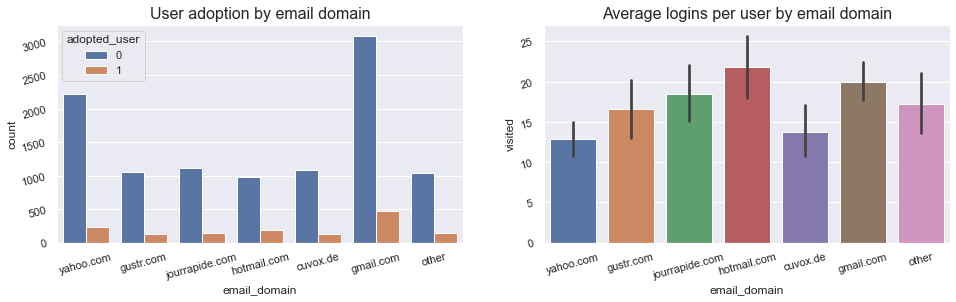

In [22]:
fig1, ax1 = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=users, x='email_domain', hue='adopted_user', ax=ax1[0])
sns.barplot(data=users, x='email_domain', y='visited', ax=ax1[1])
ax1[0].set_title('User adoption by email domain', fontsize=16)
ax1[1].set_title('Average logins per user by email domain', fontsize=16)
ax1[0].tick_params(labelrotation=15)
ax1[1].tick_params(labelrotation=15)

users.groupby('email_domain')[['adopted_user', 'visited']].mean()

,adopted_user,visited
creation_source,,
GUEST_INVITE,0.152566,21.634767
ORG_INVITE,0.115891,16.476493
PERSONAL_PROJECTS,0.067740,9.105637
SIGNUP,0.130810,17.989938
SIGNUP_GOOGLE_AUTH,0.148736,24.738628


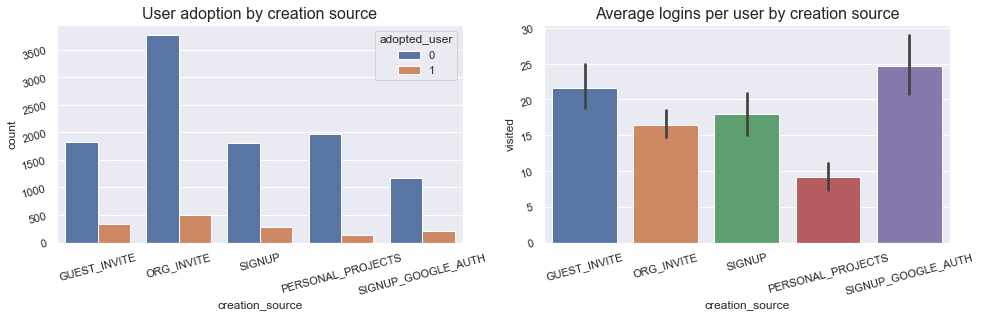

In [23]:
fig2, ax2 = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=users, x='creation_source', hue='adopted_user', ax=ax2[0])
sns.barplot(data=users, x='creation_source', y='visited', ax=ax2[1])
ax2[0].set_title('User adoption by creation source', fontsize=16)
ax2[1].set_title('Average logins per user by creation source', fontsize=16)
ax2[0].tick_params(labelrotation=15)
ax2[1].tick_params(labelrotation=15)

users.groupby('creation_source')[['adopted_user', 'visited']].mean()

In [24]:
# Organizations with at least 12 accounts (0.1%)
org_users = users.org_id.value_counts()
org_users[org_users < 12]

364    11
183    11
365    11
352    10
353    10
294    10
378    10
304    10
395     9
315     9
355     9
396     9
400     8
397     8
386     7
416     2
Name: org_id, dtype: int64

In [25]:
# Group organizations with less than 12 accounts into 999 (to represent others)
org12 = org_users[org_users < 12].index.values
users['org_id'] = users.org_id.apply(lambda o: 999 if o in org12 else o)
users.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
301     12
407     12
356     12
381     12
322     12
Name: org_id, Length: 402, dtype: int64

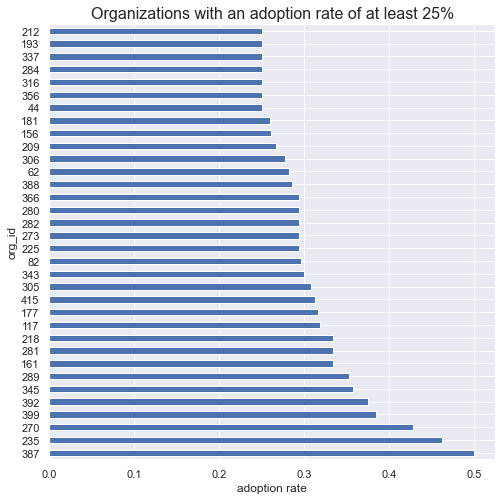

In [26]:
orgs = users.groupby('org_id')[['adopted_user', 'visited']].mean().sort_values('adopted_user', ascending=False)
plt.figure(figsize=(8, 8))
orgs[orgs.adopted_user >= 0.25].adopted_user.plot(kind='barh')
plt.title('Organizations with an adoption rate of at least 25%', fontsize=16)
plt.xlabel('adoption rate');

### Encode categorical variables

##### Although `org_id` is a numerical variable, the numbers are just a proxy for organization names so there is currently no logical ordering to these numbers. I am encoding these labels with their corresponding adoption rate. The same will be done for `creation_source` and `email_domain`.

In [27]:
# Create an organization-to-adoption-rate mapping
org_ar = {}
for o in orgs.iterrows():
    org_ar[o[0]] = o[1].adopted_user
len(org_ar)

402

In [28]:
# Encode org_id
users['org_id'] = users.org_id.map(org_ar)
users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,visited,email_domain,invited
0,GUEST_INVITE,1,0,0.106667,0,1.0,yahoo.com,1
1,ORG_INVITE,0,0,0.055794,0,14.0,gustr.com,1
2,ORG_INVITE,0,0,0.187500,0,1.0,gustr.com,1
3,GUEST_INVITE,0,0,0.055794,0,1.0,yahoo.com,1
4,GUEST_INVITE,0,0,0.250000,0,1.0,yahoo.com,1


In [29]:
# Encode creation_source
src_ar = users.groupby('creation_source').adopted_user.mean().to_dict()
users['creation_source'] = users.creation_source.map(src_ar)
users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,visited,email_domain,invited
0,0.152566,1,0,0.106667,0,1.0,yahoo.com,1
1,0.115891,0,0,0.055794,0,14.0,gustr.com,1
2,0.115891,0,0,0.187500,0,1.0,gustr.com,1
3,0.152566,0,0,0.055794,0,1.0,yahoo.com,1
4,0.152566,0,0,0.250000,0,1.0,yahoo.com,1


In [30]:
# Encode email_domain
dom_ar = users.groupby('email_domain').adopted_user.mean().to_dict()
users['email_domain'] = users.email_domain.map(dom_ar)
users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,visited,email_domain,invited
0,0.152566,1,0,0.106667,0,1.0,0.097262,1
1,0.115891,0,0,0.055794,0,14.0,0.109415,1
2,0.115891,0,0,0.187500,0,1.0,0.109415,1
3,0.152566,0,0,0.055794,0,1.0,0.097262,1
4,0.152566,0,0,0.250000,0,1.0,0.097262,1


### Split data

##### The `visited` feature was created using information that would not be available for newly-created users so it cannot be used here. That leaves 3 boolean variables and 3 encoded categorical variables.

In [31]:
# Split data
X = users[['creation_source', 'email_domain', 'org_id', 'invited', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']].copy()
X.columns = ['creation_source', 'email_domain', 'organization', 'invited', 'mailing_list', 'marketing_drip']
y = users['adopted_user'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1666, random_state=0, stratify=y)
X_train.shape, X_test.shape

((10000, 6), (2000, 6))

In [32]:
y_train.mean()

0.1204

##### There is a class imbalance of about 1:7

### Modeling

In [33]:
lr = LogisticRegression(max_iter=1e4)
lr.fit(X_train, y_train)

print('Train')
print('Score:', lr.score(X_train, y_train))
print('ROC AUC:', roc_auc_score(y_train, lr.predict(X_train)))
print('Confusion matrix:\n', confusion_matrix(y_train, lr.predict(X_train)))

print('\nTest')
print('Score:', lr.score(X_test, y_test))
print('ROC AUC:', roc_auc_score(y_test, lr.predict(X_test)))
print('Confusion matrix:\n', confusion_matrix(y_test, lr.predict(X_test)))

Train
Score: 0.8798
ROC AUC: 0.5054902636202805
Confusion matrix:
 [[8783   13]
 [1189   15]]

Test
Score: 0.879
ROC AUC: 0.5032966203449244
Confusion matrix:
 [[1756    3]
 [ 239    2]]


In [34]:
tree = DecisionTreeClassifier(random_state=0)
params = {'max_depth': range(2, 22, 2), 'min_samples_split': range(2, 22, 2)}
gs = GridSearchCV(tree, params, scoring='roc_auc', cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.6636647559309857
{'max_depth': 4, 'min_samples_split': 2}


In [35]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=2, random_state=0)
tree.fit(X_train, y_train)

print('Train')
print('Score:', tree.score(X_train, y_train))
print('ROC AUC:', roc_auc_score(y_train, tree.predict(X_train)))
print('Confusion matrix:\n', confusion_matrix(y_train, tree.predict(X_train)))

print('\nTest')
print('Score:', tree.score(X_test, y_test))
print('ROC AUC:', roc_auc_score(y_test, tree.predict(X_test)))
print('Confusion matrix:\n', confusion_matrix(y_test, tree.predict(X_test)))

Train
Score: 0.8796
ROC AUC: 0.5
Confusion matrix:
 [[8796    0]
 [1204    0]]

Test
Score: 0.8795
ROC AUC: 0.5
Confusion matrix:
 [[1759    0]
 [ 241    0]]


##### With a low number of positive cases, the predictions yielded a lot of false negatives with logistic regression and a 100% negative prediction with decision tree.

### Resample data

In [36]:
train = pd.concat([X_train, y_train], axis=1).reset_index().drop('index', axis=1)
train0 = train[train.adopted_user == 0]
train1 = train[train.adopted_user == 1]
train.shape, train0.shape, train1.shape

((10000, 7), (8796, 7), (1204, 7))

In [37]:
train1_resampled = train1.sample(train0.shape[0] // 2, replace=True)
train1_resampled.shape

(4398, 7)

In [38]:
train = pd.concat([train0, train1_resampled])
train.adopted_user.value_counts()

0    8796
1    4398
Name: adopted_user, dtype: int64

In [39]:
y_train = train['adopted_user'].copy()
X_train = train.drop('adopted_user', axis=1).copy()
X_train.shape, y_train.shape

((13194, 6), (13194,))

### Modeling

In [40]:
lr = LogisticRegression(max_iter=1e4)
lr.fit(X_train, y_train)

print('Train')
print('Score:', lr.score(X_train, y_train))
print('ROC AUC:', roc_auc_score(y_train, lr.predict(X_train)))
print('Confusion matrix:\n', confusion_matrix(y_train, lr.predict(X_train)))

print('\nTest')
print('Score:', lr.score(X_test, y_test))
print('ROC AUC:', roc_auc_score(y_test, lr.predict(X_test)))
print('Confusion matrix:\n', confusion_matrix(y_test, lr.predict(X_test)))

Train
Score: 0.6894042746703046
ROC AUC: 0.5677012278308322
Confusion matrix:
 [[8205  591]
 [3507  891]]

Test
Score: 0.8475
ROC AUC: 0.5659583552518288
Confusion matrix:
 [[1648  111]
 [ 194   47]]


In [41]:
tree = DecisionTreeClassifier(random_state=0)
params = {'max_depth': range(4, 44, 4), 'min_samples_split': range(2, 12, 2), 'min_samples_leaf': range(1, 6, 1)}
gs = GridSearchCV(tree, params, scoring='roc_auc', cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8733161033050715
{'max_depth': 28, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [42]:
tree = DecisionTreeClassifier(max_depth=28, random_state=0)
tree.fit(X_train, y_train)

print('Train')
print('Score:', tree.score(X_train, y_train))
print('ROC AUC:', roc_auc_score(y_train, tree.predict(X_train)))
print('Confusion matrix:\n', confusion_matrix(y_train, tree.predict(X_train)))

print('\nTest')
print('Score:', tree.score(X_test, y_test))
print('ROC AUC:', roc_auc_score(y_test, tree.predict(X_test)))
print('Confusion matrix:\n', confusion_matrix(y_test, tree.predict(X_test)))

Train
Score: 0.882219190541155
ROC AUC: 0.8714756707594361
Confusion matrix:
 [[7949  847]
 [ 707 3691]]

Test
Score: 0.763
ROC AUC: 0.5429858062507225
Confusion matrix:
 [[1465  294]
 [ 180   61]]


In [43]:
pd.DataFrame(np.array([X_train.columns.values, lr.coef_[0], tree.feature_importances_]).T, columns=['feature', 'lr_coef', 'dt_coef'])

,feature,lr_coef,dt_coef
0,creation_source,6.86582,0.0655019
1,email_domain,4.03902,0.228915
2,organization,8.00789,0.542852
3,invited,0.118942,0.0374294
4,mailing_list,0.127336,0.0777936
5,marketing_drip,-0.0894842,0.0475084


### Modeling with 3 features

In [45]:
X_train_3 = X_train.drop(['invited', 'mailing_list', 'marketing_drip'], axis=1)
X_test_3 = X_test.drop(['invited', 'mailing_list', 'marketing_drip'], axis=1)
X_train_3.head()

,creation_source,email_domain,organization
0,0.115891,0.133352,0.105263
1,0.152566,0.097262,0.090909
2,0.130810,0.133352,0.077381
3,0.115891,0.117554,0.157895
4,0.115891,0.097262,0.161290


In [47]:
lr3 = LogisticRegression(max_iter=1e4)
lr3.fit(X_train_3, y_train)

print('Train')
print('Score:', lr3.score(X_train_3, y_train))
print('ROC AUC:', roc_auc_score(y_train, lr3.predict(X_train_3)))
print('Confusion matrix:\n', confusion_matrix(y_train, lr3.predict(X_train_3)))

print('\nTest')
print('Score:', lr3.score(X_test_3, y_test))
print('ROC AUC:', roc_auc_score(y_test, lr3.predict(X_test_3)))
print('Confusion matrix:\n', confusion_matrix(y_test, lr3.predict(X_test_3)))

Train
Score: 0.6898590268303775
ROC AUC: 0.5679854479308777
Confusion matrix:
 [[8212  584]
 [3508  890]]

Test
Score: 0.8475
ROC AUC: 0.5677487916323637
Confusion matrix:
 [[1647  112]
 [ 193   48]]


In [48]:
tree3 = DecisionTreeClassifier(random_state=0)
params = {'max_depth': range(4, 44, 4), 'min_samples_split': range(2, 12, 2), 'min_samples_leaf': range(1, 6, 1)}
gs3 = GridSearchCV(tree3, params, scoring='roc_auc', cv=5)
gs3.fit(X_train_3, y_train)
print(gs3.best_score_)
print(gs3.best_params_)

0.8369284302452096
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [49]:
tree3 = DecisionTreeClassifier(max_depth=20, random_state=0)
tree3.fit(X_train_3, y_train)

print('Train')
print('Score:', tree3.score(X_train_3, y_train))
print('ROC AUC:', roc_auc_score(y_train, tree3.predict(X_train_3)))
print('Confusion matrix:\n', confusion_matrix(y_train, tree3.predict(X_train_3)))

print('\nTest')
print('Score:', tree3.score(X_test_3, y_test))
print('ROC AUC:', roc_auc_score(y_test, tree3.predict(X_test_3)))
print('Confusion matrix:\n', confusion_matrix(y_test, tree3.predict(X_test_3)))

Train
Score: 0.8237835379718054
ROC AUC: 0.7982037289677127
Confusion matrix:
 [[7696 1100]
 [1225 3173]]

Test
Score: 0.751
ROC AUC: 0.5343733118826945
Confusion matrix:
 [[1442  317]
 [ 181   60]]


In [50]:
pd.DataFrame(np.array([X_train_3.columns.values, lr3.coef_[0], tree3.feature_importances_]).T, columns=['feature', 'lr_coef', 'dt_coef'])

,feature,lr_coef,dt_coef
0,creation_source,7.205,0.125151
1,email_domain,3.86543,0.262236
2,organization,8.00698,0.612613
